#**The GRIP (Graduate Rotational Internship Program)**
DOMAIN : DATA SCIENCE AND BUSINESS ANALYTICS

#**NAME OF CANDIDATE : SURAJKUMAR SONDAGAR**
*TASK 7 : Stock Market Prediction Using Numerical And Textual Analysis (LSTM+NLP+RNN+KMEANS+WORD2VEC)*

In this notebook we will be looking at data from the stock market, particularly some technology stocks. We will learn how to use pandas to get stock information, visualize different aspects of it, and finally we will look at a few ways of analyzing the risk of a stock, based on its previous performance history. We will also be predicting future stock prices through a Long Short Term Memory (LSTM) method!

#  **Importing Libraries:**

In [2]:
import math
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline
from pandas_datareader.data import DataReader
from datetime import datetime
import tensorflow 
from tensorflow import keras
import pandas as pd
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import *
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import EarlyStopping

### **We'll be answering the following questions along the way:**

1) What was the change in price of the stock over time? 

2) What was the daily return of the stock on average?

3) What was the moving average of the various stocks?

4) What was the correlation between different stocks?

5) How much value do we put at risk by investing in a particular stock?

6) How can we attempt to predict future stock behavior? (Predicting the closing price stock price of TESLA inc using LSTM)

# **1. What was the change in price of the stock overtime?**
In this section we'll go over how to handle requesting stock information with pandas, and how to analyze basic attributes of a stock.

In [3]:
# The tech stocks we'll use for this analysis
tech_list = ['AAPL', 'FB', 'TSLA', 'AMZN']

# Set up End and Start times for data grab
end = datetime.now()
start = datetime(end.year - 1, end.month, end.day)


#For loop for grabing yahoo finance data and setting as a dataframe
for stock in tech_list:   
    # Set DataFrame as the Stock Ticker
    globals()[stock] = DataReader(stock, 'yahoo', start, end)

Let's go ahead and play aorund with the TESLA DataFrame to get a feel for the data


In [4]:
company_list = [AAPL, FB , TSLA, AMZN]
company_name = ["APPLE", "FACEBOOK.INC", "TESLA", "AMAZON"]

for company, com_name in zip(company_list, company_name):
    company["company_name"] = com_name
    
df = pd.concat(company_list, axis=0)
df

,High,Low,Open,Close,Volume,Adj Close,company_name
Date,,,,,,,
2020-06-15,86.419998,83.144997,83.312500,85.747498,138808800.0,85.173584,APPLE
2020-06-16,88.300003,86.180000,87.864998,88.019997,165428800.0,87.430885,APPLE
2020-06-17,88.849998,87.772499,88.787498,87.897499,114406400.0,87.309204,APPLE
2020-06-18,88.362503,87.305000,87.852501,87.932503,96820400.0,87.343979,APPLE
2020-06-19,89.139999,86.287498,88.660004,87.430000,264476000.0,86.844833,APPLE
...,...,...,...,...,...,...,...
2021-06-09,3297.580078,3270.699951,3272.870117,3281.149902,2455500.0,3281.149902,AMAZON
2021-06-10,3351.000000,3281.149902,3282.010010,3349.649902,3476500.0,3349.649902,AMAZON
2021-06-11,3366.580078,3333.449951,3349.649902,3346.830078,2813900.0,3346.830078,AMAZON


In [5]:
# Summary Stats
TSLA.describe()

,High,Low,Open,Close,Volume,Adj Close
count,253.000000,253.000000,253.000000,253.000000,2.530000e+02,253.000000
mean,556.754173,529.332641,543.983993,544.104173,4.876277e+07,544.104173
std,188.479955,182.255985,185.967826,185.556334,2.932130e+07,185.556334
min,197.195999,181.699997,183.557999,191.947998,1.259906e+07,191.947998
25%,419.097992,402.000000,409.730011,409.996002,2.884540e+07,409.996002
50%,599.039978,571.070007,590.020020,585.760010,3.957840e+07,585.760010
75%,700.700012,667.840027,685.700012,682.219971,6.104100e+07,682.219971
max,900.400024,871.599976,891.380005,883.090027,2.221262e+08,883.090027


In [6]:
# General info
TSLA.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 253 entries, 2020-06-15 to 2021-06-15
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   High          253 non-null    float64
 1   Low           253 non-null    float64
 2   Open          253 non-null    float64
 3   Close         253 non-null    float64
 4   Volume        253 non-null    float64
 5   Adj Close     253 non-null    float64
 6   company_name  253 non-null    object 
dtypes: float64(6), object(1)
memory usage: 15.8+ KB


Let's see a historical view of the closing price

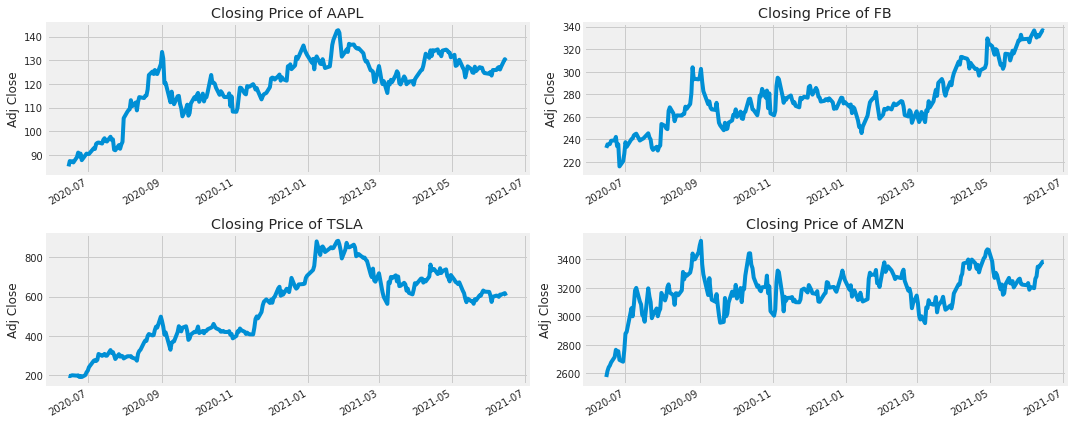

In [7]:
plt.figure(figsize=(15, 6))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Adj Close'].plot()
    plt.ylabel('Adj Close')
    plt.xlabel(None)
    plt.title(f"Closing Price of {tech_list[i - 1]}")
    
plt.tight_layout()

Now let's plot the total volume of stock being traded each day

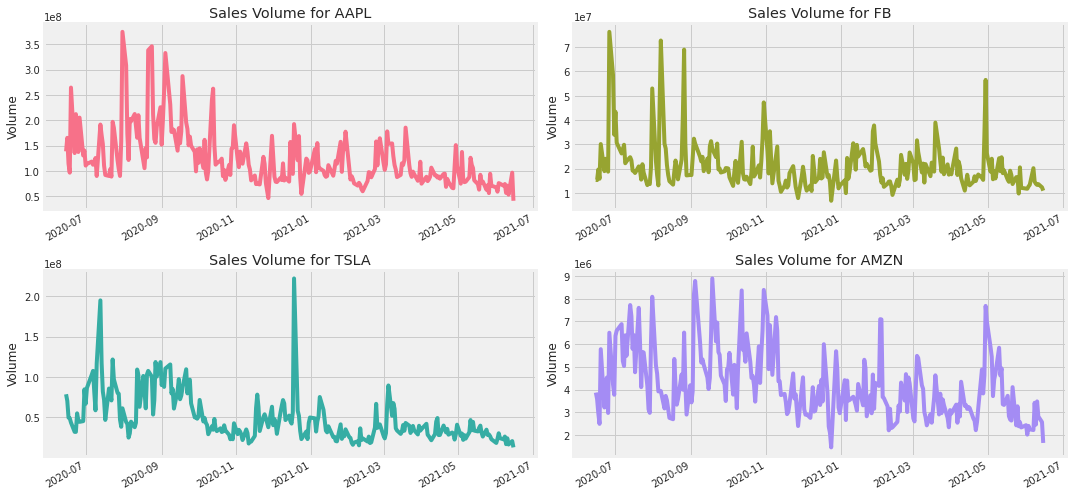

In [8]:
plt.figure(figsize=(15, 7))
plt.subplots_adjust(top=1.25, bottom=1.2)
palette = iter(sns.husl_palette(len(company_list)))
for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Volume'].plot( color=next(palette))
    plt.ylabel('Volume')
    plt.xlabel(None)
    plt.title(f"Sales Volume for {tech_list[i - 1]}")
    
plt.tight_layout()

# **2. What was the moving average of the various stocks?**

In [9]:
ma_day = [10, 20, 50]

for ma in ma_day:
    for company in company_list:
        column_name = f"MA for {ma} days"
        company[column_name] = company['Adj Close'].rolling(ma).mean()

Now let's go ahead and plot all the additional Moving Averages

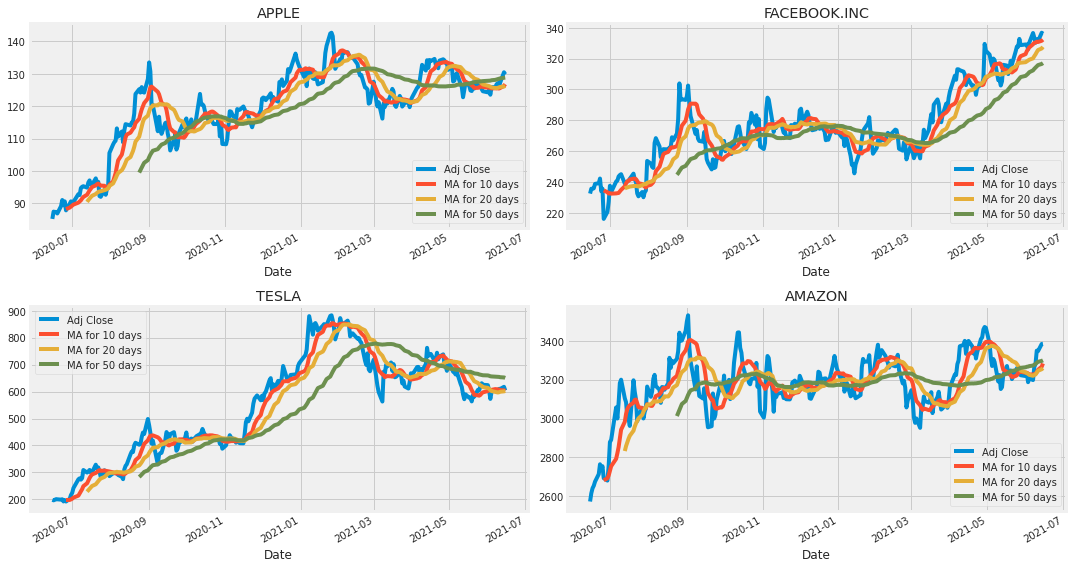

In [10]:
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(8)
fig.set_figwidth(15)

AAPL[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,0])
axes[0,0].set_title('APPLE')

FB[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,1])
axes[0,1].set_title('FACEBOOK.INC')

TSLA[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,0])
axes[1,0].set_title('TESLA')

AMZN[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,1])
axes[1,1].set_title('AMAZON')

fig.tight_layout()

# **3) What was the daily return of the stock on average?**

Now that we've done some baseline analysis, let's go ahead and dive a little deeper. We're now going to analyze the risk of the stock. In order to do so we'll need to take a closer look at the daily changes of the stock, and not just its absolute value. Let's go ahead and use pandas to retrieve the daily returns for the Tesla stock.

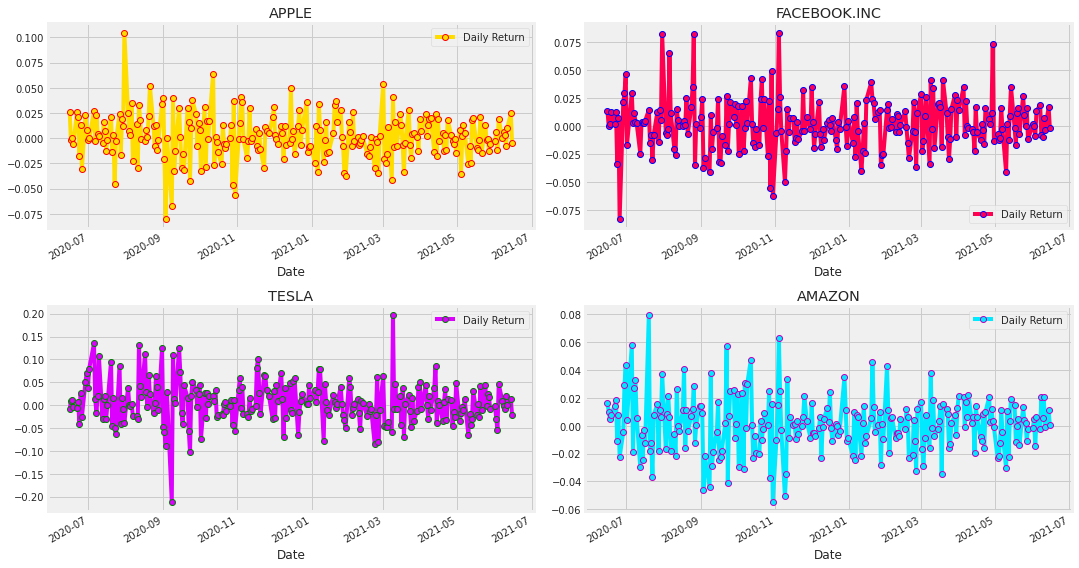

In [11]:
# We'll use pct_change to find the percent change for each day
for company in company_list:
    company['Daily Return'] = company['Adj Close'].pct_change()

# Then we'll plot the daily return percentage
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(8)
fig.set_figwidth(15)

AAPL['Daily Return'].plot(ax=axes[0,0], legend=True, linestyle='-', color='#ffdd00', marker='o', mec='r')
axes[0,0].set_title('APPLE')

FB['Daily Return'].plot(ax=axes[0,1], legend=True, linestyle='-', color="#ff0051", marker='o', mec='b')
axes[0,1].set_title('FACEBOOK.INC')

TSLA['Daily Return'].plot(ax=axes[1,0], legend=True, linestyle='-', color="#dc00ff", marker='o', mec='g')
axes[1,0].set_title('TESLA')

AMZN['Daily Return'].plot(ax=axes[1,1], legend=True, linestyle='-', color="#00e9ff", marker='o', mec ='m')
axes[1,1].set_title('AMAZON')

fig.tight_layout()

Great, now let's get an overall look at the average daily return using a histogram. We'll use seaborn to create both a histogram and kde plot on the same figure.

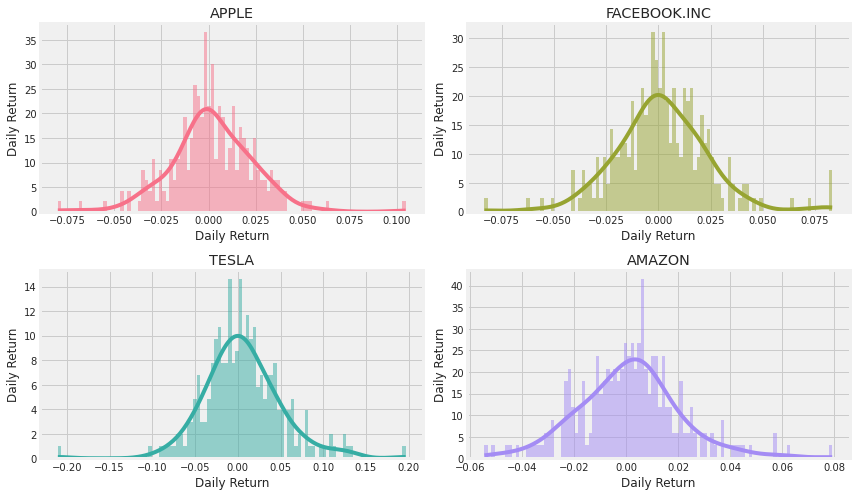

In [12]:
# Note the use of dropna() here, otherwise the NaN values can't be read by seaborn
plt.figure(figsize=(12, 7))
palette = iter(sns.husl_palette(len(company_list)))
for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    sns.histplot(company['Daily Return'].dropna(), kde=True, stat="density", linewidth=0,
bins=100, color=next(palette))
    plt.ylabel('Daily Return')
    plt.title(f'{company_name[i - 1]}')
plt.tight_layout()

#**4) What was the correlation between different stocks closing prices?**

Now what if we wanted to analyze the returns of all the stocks in our list? Let's go ahead and build a DataFrame with all the ['Close'] columns for each of the stocks dataframes.

In [13]:
# Grab all the closing prices for the tech stock list into one DataFrame
closing_df = DataReader(tech_list, 'yahoo', start, end)['Adj Close']

# Let's take a quick look
closing_df.head() 

Symbols,AAPL,FB,TSLA,AMZN
Date,,,,
2020-06-15,85.173584,232.500000,198.179993,2572.679932
2020-06-16,87.430885,235.649994,196.425995,2615.270020
2020-06-17,87.309204,235.529999,198.358002,2640.979980
2020-06-18,87.343979,235.940002,200.792007,2653.979980
2020-06-19,86.844833,238.789993,200.179993,2675.010010


Now that we have all the closing prices, let's go ahead and get the daily return for all the stocks, like we did for the TESLA stock.

In [14]:
# Make a new tech returns DataFrame
tech_rets = closing_df.pct_change()
tech_rets.head()

Symbols,AAPL,FB,TSLA,AMZN
Date,,,,
2020-06-15,NaN,NaN,NaN,NaN
2020-06-16,0.026502,0.013548,-0.008851,0.016555
2020-06-17,-0.001392,-0.000509,0.009836,0.009831
2020-06-18,0.000398,0.001741,0.012271,0.004922
2020-06-19,-0.005715,0.012079,-0.003048,0.007924


Now we can compare the daily percentage return of two stocks to check how correlated. First let's see a sotck compared to itself.

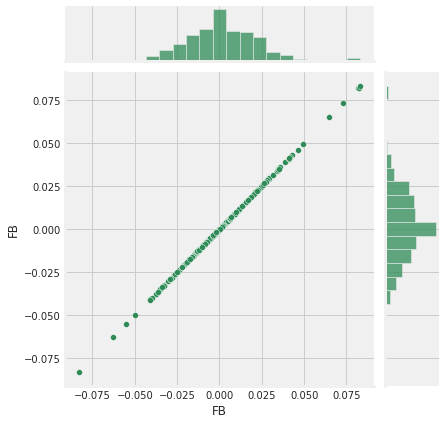

In [15]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
# Comparing FACEBOOK.INC to itself should show a perfectly linear relationship
sns.jointplot('FB', 'FB', tech_rets, kind='scatter', color='seagreen')

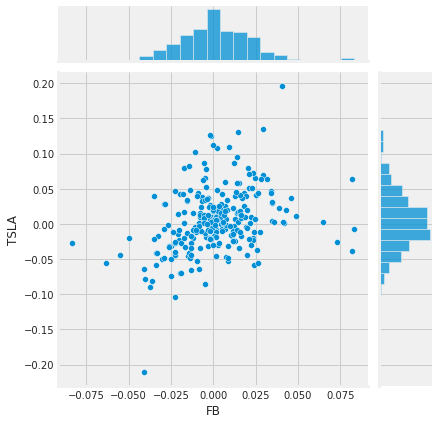

In [16]:
# We'll use joinplot to compare the daily returns of Google and Microsoft
sns.jointplot('FB', 'TSLA', tech_rets, kind='scatter')

So now we can see that if two stocks are perfectly (and positivley) correlated with each other a linear relationship bewteen its daily return values should occur.

Seaborn and pandas make it very easy to repeat this comparison analysis for every possible combination of stocks in our technology stock ticker list. We can use sns.pairplot() to automatically create this plot

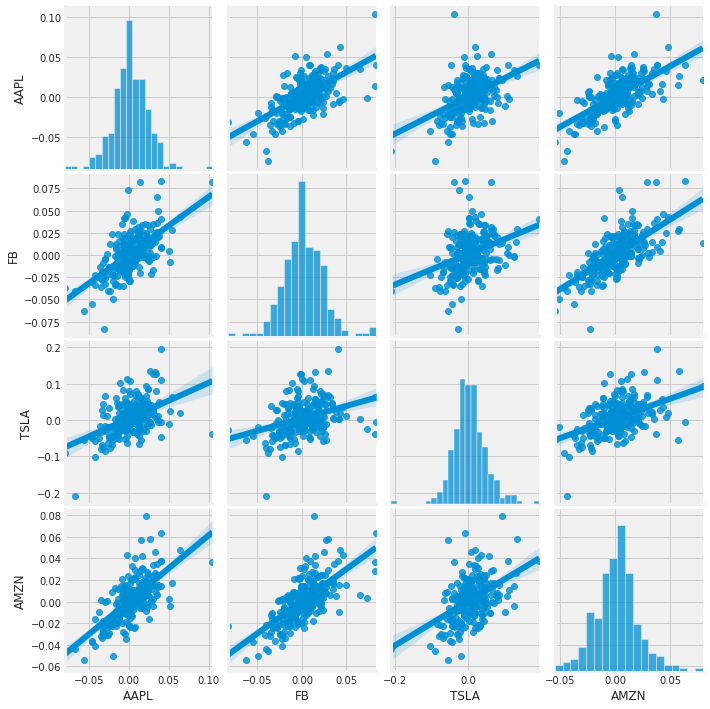

In [17]:
sns.pairplot(tech_rets, kind='reg')

Above we can see all the relationships on daily returns between all the stocks. A quick glance shows an interesting correlation between Facebook.inc and Amazon daily returns. It might be interesting to investigate that individual comaprison. While the simplicity of just calling sns.pairplot() is fantastic we can also use sns.PairGrid() for full control of the figure, including what kind of plots go in the diagonal, the upper triangle, and the lower triangle. Below is an example of utilizing the full power of seaborn to achieve this result.

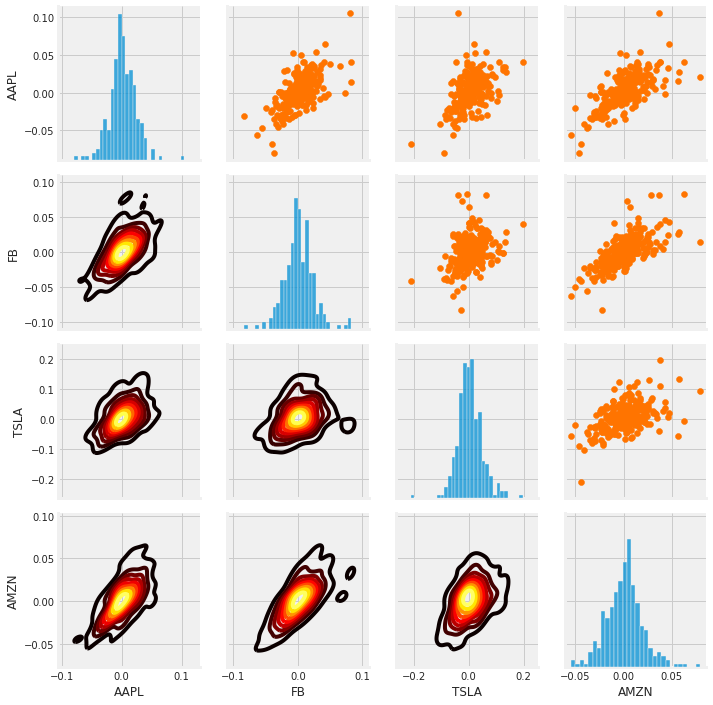

In [18]:
# Set up our figure by naming it returns_fig, call PairPLot on the DataFrame
return_fig = sns.PairGrid(tech_rets.dropna())

# Using map_upper we can specify what the upper triangle will look like.
return_fig.map_upper(plt.scatter, color='#ff7400')

# We can also define the lower triangle in the figure, inclufing the plot type (kde) 
return_fig.map_lower(sns.kdeplot, cmap='hot')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
return_fig.map_diag(sns.histplot, bins=30)

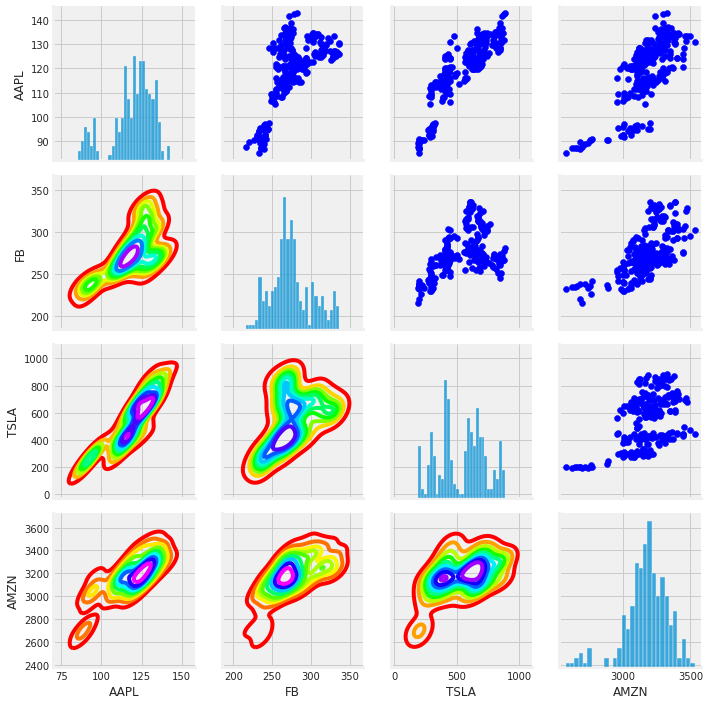

In [19]:
# Set up our figure by naming it returns_fig, call PairPLot on the DataFrame
returns_fig = sns.PairGrid(closing_df)

# Using map_upper we can specify what the upper triangle will look like.
returns_fig.map_upper(plt.scatter,color='b')

# We can also define the lower triangle in the figure, inclufing the plot type (kde)
returns_fig.map_lower(sns.kdeplot,cmap='hsv')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
returns_fig.map_diag(sns.histplot,bins=30)

Finally, we could also do a correlation plot, to get actual numerical values for the correlation between the stocks' daily return values. By comparing the closing prices, we see an interesting relationship between TESLA and Apple.

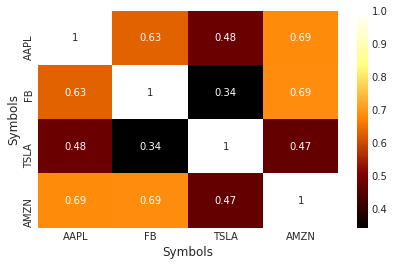

In [20]:
# Let's go ahead and use sebron for a quick correlation plot for the daily returns
sns.heatmap(tech_rets.corr(), annot=True, cmap='afmhot')

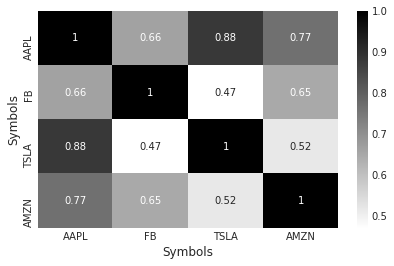

In [21]:
sns.heatmap(closing_df.corr(), annot=True, cmap='binary')

Fantastic! Just like we suspected in our PairPlot we see here numerically and visually that Tesla and Amazon had the strongest correlation of daily stock return. It's also interesting to see that all the technology comapnies are positively correlated.

#**5) How much value do we put at risk by investing in a particular stock?**

There are many ways we can quantify risk, one of the most basic ways using the information we've gathered on daily percentage returns is by comparing the expected return with the standard deviation of the daily returns.

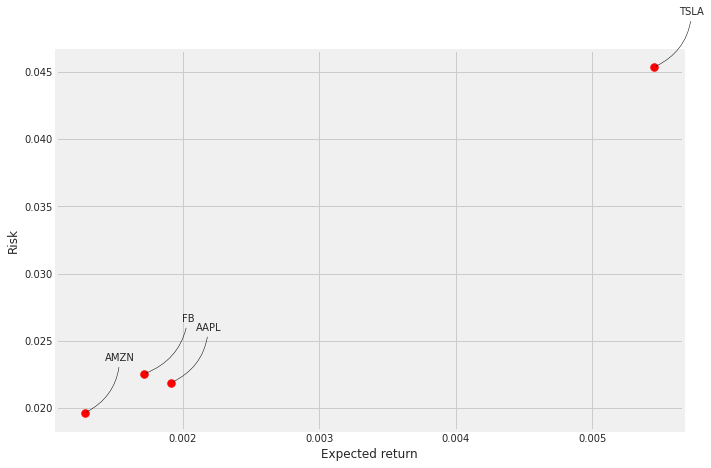

In [22]:
# Let's start by defining a new DataFrame as a clenaed version of the oriignal tech_rets DataFrame
rets = tech_rets.dropna()

area = np.pi * 20

plt.figure(figsize=(10, 7))
plt.scatter(rets.mean(), rets.std(), s=area, color='r')
plt.xlabel('Expected return')
plt.ylabel('Risk')

for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(label, xy=(x, y), xytext=(50, 50), textcoords='offset points', ha='right', va='bottom', 
                 arrowprops=dict(arrowstyle='-', color='k', connectionstyle='arc3,rad=-0.3'))

#**6) Predicting the closing price stock price of TESLA :**

![Alt text](https://electrek.co/wp-content/uploads/sites/3/2021/05/Tesla-Logo-Hero.jpg?resize=1536,768)





Tesla, Inc. (formerly Tesla Motors, Inc.) is an American electric vehicle and clean energy company based in Palo Alto, California. Tesla's current products include electric cars (the Model S, Model 3, Model X, and Model Y), battery energy storage from home to grid scale (the Powerwall, Powerpack, and Megapack), solar products (solar panels and solar roof tiles) and related products and services.

In [167]:
dataset= DataReader('TSLA', data_source='yahoo', start='2010-6-12', end=datetime.now(),)
dataset

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2010-06-29,5.000000,3.508000,3.800000,4.778000,93831500.0,4.778000
2010-06-30,6.084000,4.660000,5.158000,4.766000,85935500.0,4.766000
2010-07-01,5.184000,4.054000,5.000000,4.392000,41094000.0,4.392000
2010-07-02,4.620000,3.742000,4.600000,3.840000,25699000.0,3.840000
2010-07-06,4.000000,3.166000,4.000000,3.222000,34334500.0,3.222000
...,...,...,...,...,...,...
2021-06-09,611.789978,597.630005,602.169983,598.780029,16584600.0,598.780029
2021-06-10,616.590027,600.500000,603.880005,610.119995,23919600.0,610.119995
2021-06-11,612.559998,601.520020,610.229980,609.890015,16165000.0,609.890015


## **T-delay**
Creating the dataset to be used by RNN.

In [85]:
def create_dataset(dataset, look_back=60):
    dataX, dataY = [], []
    for i in range(len(dataset) - look_back):
        a = dataset[i : (i + look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return pd.DataFrame(np.array(dataX)), np.array(dataY)


X_close, Y_close = create_dataset(dataset[["Close"]].values)
aux = X_close
aux["Target"] = Y_close
aux

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,Target
0,4.778000,4.766000,4.392000,3.840000,3.222000,3.160000,3.492000,3.480000,3.410000,3.628000,3.968000,3.978000,4.128000,4.382000,4.060000,4.044000,4.200000,4.258000,4.190000,4.110000,4.144000,4.070000,3.988000,4.184000,4.390000,4.252000,4.090000,3.918000,3.920000,3.806000,3.580000,3.520000,3.664000,3.756000,3.830000,3.754000,3.758000,3.820000,4.026000,3.840000,3.980000,3.950000,3.940000,3.974000,3.896000,4.090000,4.212000,4.210000,4.108000,4.180000,4.142000,4.034000,4.144000,4.224000,4.396000,4.188000,4.046000,4.212000,4.154000,3.974000,3.912000
1,4.766000,4.392000,3.840000,3.222000,3.160000,3.492000,3.480000,3.410000,3.628000,3.968000,3.978000,4.128000,4.382000,4.060000,4.044000,4.200000,4.258000,4.190000,4.110000,4.144000,4.070000,3.988000,4.184000,4.390000,4.252000,4.090000,3.918000,3.920000,3.806000,3.580000,3.520000,3.664000,3.756000,3.830000,3.754000,3.758000,3.820000,4.026000,3.840000,3.980000,3.950000,3.940000,3.974000,3.896000,4.090000,4.212000,4.210000,4.108000,4.180000,4.142000,4.034000,4.144000,4.224000,4.396000,4.188000,4.046000,4.212000,4.154000,3.974000,3.912000,4.020000
2,4.392000,3.840000,3.222000,3.160000,3.492000,3.480000,3.410000,3.628000,3.968000,3.978000,4.128000,4.382000,4.060000,4.044000,4.200000,4.258000,4.190000,4.110000,4.144000,4.070000,3.988000,4.184000,4.390000,4.252000,4.090000,3.918000,3.920000,3.806000,3.580000,3.520000,3.664000,3.756000,3.830000,3.754000,3.758000,3.820000,4.026000,3.840000,3.980000,3.950000,3.940000,3.974000,3.896000,4.090000,4.212000,4.210000,4.108000,4.180000,4.142000,4.034000,4.144000,4.224000,4.396000,4.188000,4.046000,4.212000,4.154000,3.974000,3.912000,4.020000,4.106000
3,3.840000,3.222000,3.160000,3.492000,3.480000,3.410000,3.628000,3.968000,3.978000,4.128000,4.382000,4.060000,4.044000,4.200000,4.258000,4.190000,4.110000,4.144000,4.070000,3.988000,4.184000,4.390000,4.252000,4.090000,3.918000,3.920000,3.806000,3.580000,3.520000,3.664000,3.756000,3.830000,3.754000,3.758000,3.820000,4.026000,3.840000,3.980000,3.950000,3.940000,3.974000,3.896000,4.090000,4.212000,4.210000,4.108000,4.180000,4.142000,4.034000,4.144000,4.224000,4.396000,4.188000,4.046000,4.212000,4.154000,3.974000,3.912000,4.020000,4.106000,4.280000
4,3.222000,3.160000,3.492000,3.480000,3.410000,3.628000,3.968000,3.978000,4.128000,4.382000,4.060000,4.044000,4.200000,4.258000,4.190000,4.110000,4.144000,4.070000,3.988000,4.184000,4.390000,4.252000,4.090000,3.918000,3.920000,3.806000,3.580000,3.520000,3.664000,3.756000,3.830000,3.754000,3.758000,3.820000,4.026000,3.840000,3.980000,3.950000,3.940000,3.974000,3.896000,4.090000,4.212000,4.210000,4.108000,4.180000,4.142000,4.034000,4.144000,4.224000,4.396000,4.188000,4.046000,4.212000,4.154000,3.974000,3.912000,4.020000,4.106000,4.280000,4.396000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2695,707.940002,676.880005,701.809998,653.159973,654.869995,670.000000,662.159973,630.270020,640.390015,618.710022,611.289978,635.619995,667.929993,661.750000,691.049988,691.619995,670.969971,683.799988,677.020020,701.979980,762.320007,732.229980,738.849976,739.780029,714.630005,718.989990,744.119995,719.690002,729.400024,738.200012,704.739990,694.400024,677.000000,709.440002,684.900024,673.599976,670.940002,663.539978,672.369995,629.039978,617.200012,589.890015,571.690002,589.739990,576.830017,577.869995,563.460022,586.780029,580.880005,606.440002,604.690002,619.130005,630.849976,625.219971,623.900024,605.119995,572.840027,599.049988,605.130005,603.590027,598.780029
2696,676.880005,701.809998,653.159973,654.869995,670.000000,662.159973,630.270020,640.390015,618.710022,611.289978,635.619995,667.929993,661.75

In [86]:
del aux

## **Reshaping**
The dimensions is (n_sample, t_delays, 1).

Divide between train and test.

In [87]:
def split_dataset(X, Y):
    X_train = X[:-100].values
    y_train = Y[:-100]

    X_test = X[-100:].values
    y_test = Y[-100:]
    return X_train, y_train, X_test, y_test


# Close dataset
X_train_close, y_train_close, X_test_close, y_test_close = split_dataset(
    X_close, Y_close
)

Using MinMaxScaler on feature.

In [88]:
sc_close_x = MinMaxScaler()
sc_close_y = MinMaxScaler()

# X Scale
X_train_close_scaled = sc_close_x.fit_transform(X_train_close).reshape(
    *X_train_close.shape, 1
)
X_test_close_scaled = sc_close_x.transform(X_test_close).reshape(*X_test_close.shape, 1)

# Y Scale
y_train_close_scaled = sc_close_y.fit_transform(y_train_close.reshape(-1, 1)).reshape(
    -1
)
y_test_close_scaled = sc_close_y.transform(y_test_close.reshape(-1, 1)).reshape(-1)


In [89]:
print(X_train_close_scaled.shape)
print(y_train_close_scaled.shape)

(2600, 61, 1)
(2600,)


# RNN ( Recurrent Neural Network ) Using LSTM
Creating and traing the RNN.

In [90]:
def gen_model():
    rnn = Sequential()
    rnn.add(LSTM(units=360, return_sequences=True, input_shape=(X_train_close_scaled.shape[1], 1)))
    rnn.add(Dropout(0.2))
    rnn.add(LSTM(units=360, return_sequences=True))
    rnn.add(Dropout(0.2))
    rnn.add(LSTM(units=360, return_sequences=True))
    rnn.add(Dropout(0.2))
    rnn.add(LSTM(units=360, return_sequences=True))
    rnn.add(Dropout(0.2))
    rnn.add(LSTM(units=360, return_sequences=True))
    rnn.add(Dropout(0.2))
    rnn.add(LSTM(units=360))
    rnn.add(Dropout(0.2))
    rnn.add(Dense(units=1,activation='relu'))
    rnn.compile(optimizer="adam", loss=["mean_squared_error",'cosine_similarity'])
    callback = keras.callbacks.EarlyStopping(
        monitor="val_loss",
        min_delta=0,
        patience=0,
        verbose=False,
        mode="auto",
        baseline=None,
        restore_best_weights=False,
    )
    return rnn

rnn = gen_model()
history = rnn.fit(X_train_close_scaled, 
                  y_train_close_scaled,
                  validation_data=(X_test_close_scaled,
                                   y_test_close_scaled),
                  epochs=40, batch_size=32)

Epoch 1/40
82/82 [==============================] - 11s 62ms/step - loss: 0.0310 - val_loss: 0.0084
Epoch 2/40
82/82 [==============================] - 3s 42ms/step - loss: 6.6123e-04 - val_loss: 0.0719
Epoch 3/40
82/82 [==============================] - 3s 42ms/step - loss: 0.0012 - val_loss: 0.0101
Epoch 4/40
82/82 [==============================] - 3s 42ms/step - loss: 6.0297e-04 - val_loss: 0.0075
Epoch 5/40
82/82 [==============================] - 3s 42ms/step - loss: 0.0013 - val_loss: 0.0084
Epoch 6/40
82/82 [==============================] - 3s 42ms/step - loss: 4.9900e-04 - val_loss: 0.0061
Epoch 7/40
82/82 [==============================] - 3s 43ms/step - loss: 9.2324e-04 - val_loss: 0.0557
Epoch 8/40
82/82 [==============================] - 3s 43ms/step - loss: 8.9256e-04 - val_loss: 0.0129
Epoch 9/40
82/82 [==============================] - 3s 43ms/step - loss: 5.3430e-04 - val_loss: 0.0060
Epoch 10/40
82/82 [==============================] - 4s 43ms/step - loss: 5.4110e-04

## **Predictions and take the real values**

In [91]:
import plotly.graph_objects as go
history_df = pd.DataFrame(history.history)
go.Figure() \
.add_trace(go.Scatter(x=history_df.index, y=history_df.loss, mode="lines", name="Train Loss")) \
.add_trace(go.Scatter(x=history_df.index, y=history_df.val_loss, mode="lines", name="Validation Loss")) \
.update_layout(
    title="Train Metrics",
    xaxis_title="Epochs",
    yaxis_title="Loss",
)

# **Plot results and evaluation**
Just using R2 and MSE to mensure the RNN performace and ploting the graph to compare predict values and real values as well.

In [92]:
# Model
y_pred = rnn.predict(X_test_close_scaled)
y_true = y_test_close_scaled
test_dates = dataset.reset_index()["Date"][-100:]

# Original values
y_pred_original = sc_close_y.inverse_transform(y_pred.reshape(-1, 1)).reshape(-1)
y_true_original = sc_close_y.inverse_transform(y_true.reshape(-1, 1)).reshape(-1)

In [93]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Create traces
go.Figure().add_trace(
    go.Scatter(x=test_dates, y=y_true_original, mode="lines", name="Real Close",)
).add_trace(
    go.Scatter(x=test_dates, y=y_pred_original, mode="lines", name="Predicted Close",)
).update_layout(
    title="Stock price - Tesla Motors",
    xaxis_title="Date",
    yaxis_title="Stock price ($)",
).show()

print("r2_score close :", r2_score(y_true, y_pred)*100)
print("mean_squared_error close:", mean_squared_error(y_true, y_pred))
print("Root mean_squared_error close:", mean_squared_error(y_true, y_pred , squared=False))
print("mean_abosulate_error close:", mean_absolute_error(y_true, y_pred))

r2_score close : 78.43835107393997
mean_squared_error close: 0.002072261029862825
Root mean_squared_error close: 0.045522093865098354
mean_abosulate_error close: 0.0374443550677037


# **Predicting the Sentiments by Un-Supervised method**
-  Preprocess the headlines to remove the punctuations, stop words and lemmatise the words. Save this pre processed headlines in clean_headlines.csv file

- Train the CBOW (Continous Bag Of Words) model to create word embeddings of size 300. After training, each word is represented by 300 dimension vector. Hence, The vocabulary of whole headline corpus is in 300 Dimensions. Save the model as 'word2vec.model'

- Using K means clustering, create two clusters. This way, all the words in 300 Dimensions, would be divided into 2 Cluster based on spatial similarity.

- Determine the sentiment coefficient for each word in headline corpus. The sentiment coefficient is determined by

 A) Closeness score, which is score of closeness of a datapoint from their own cluster centroids and

 B) cluster value, which is 1 or -1 based on if the cluster is positive or negative cluster

- Create a dictionary of Sentiment Coefficient for each words.

- Determine the TF-IDF value of each word and create the dictionary IF-IDF for each word

- Replace the words in sentence with TF-IDF value from the above dictionary, to get the TF-IDF vector of the sentence.

- Replace the words in sentence with sentiment coefficients created above, from Sentiment Coefficient dictionary to create another vector.

- Take the dot product of both vectors to determine the sentiment rate. If the sentiment rate is positive, then sentiment is overall positive, otherwise, it is negatve

# **Loading News Headlines Dataset For Sentiment Analysis**

In [33]:
#Import for NLP
import nltk
from textblob import TextBlob
import string
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import os.path
import pickle


from tqdm import tqdm
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

from sklearn.cluster import KMeans


from gensim.models import Word2Vec
import multiprocessing
from time import time 

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, confusion_matrix,  precision_score, recall_score, f1_score

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


# **Loading Dataset**

In [34]:
import pandas as pd
import io
import requests

url =  "https://dataverse.harvard.edu/api/access/datafile/4439522"
s = requests.get(url).content
news = pd.read_csv(io.StringIO(s.decode('utf-8')))

In [35]:
news.head()

,publish_date,headline_category,headline_text
0,20010102,unknown,Status quo will not be disturbed at Ayodhya; s...
1,20010102,unknown,Fissures in Hurriyat over Pak visit
2,20010102,unknown,America's unwanted heading for India?
3,20010102,unknown,For bigwigs; it is destination Goa
4,20010102,unknown,Extra buses to clear tourist traffic


In [36]:
news.shape

(3424067, 3)

In [37]:
news.columns

Index(['publish_date', 'headline_category', 'headline_text'], dtype='object')

### This to check if there is any Null Values

In [38]:
news.isna().sum()

publish_date         0
headline_category    0
headline_text        0
dtype: int64

Converting publish_date column to Datetime Format

In [39]:
news['publish_date'] = pd.to_datetime(news['publish_date'], format = '%Y%m%d')
news.head()

,publish_date,headline_category,headline_text
0,2001-01-02,unknown,Status quo will not be disturbed at Ayodhya; s...
1,2001-01-02,unknown,Fissures in Hurriyat over Pak visit
2,2001-01-02,unknown,America's unwanted heading for India?
3,2001-01-02,unknown,For bigwigs; it is destination Goa
4,2001-01-02,unknown,Extra buses to clear tourist traffic


finding unique values in headline_category and checking all the values count (unique values total count)

In [40]:
pd.Series(np.unique(news['headline_category']))

0                                    2008-in-pictures
1                                          2010-stars
2                                  2011-top-slideshow
3                                    2011-top-stories
4       2013-the-year-sachin-bids-adieu.football-2013
                            ...                      
1008                young-india-votes.from-the-states
1009                    young-india-votes.gallup-poll
1010                           young-india-votes.news
1011                  young-india-votes.talking-point
1012                                      young-turks
Length: 1013, dtype: object

In [41]:
news['headline_category'].value_counts()

india                                              288541
unknown                                            209582
city.mumbai                                        134428
city.delhi                                         127717
business.india-business                            116761
                                                    ...  
elections.lok-sabha-elections-2019.tripura.news         8
elections.assembly-elections.goa                        8
editorialt                                              8
business.mf-simplified.faq                              8
young-turks                                             8
Name: headline_category, Length: 1013, dtype: int64

In [42]:
#total unique values count
news['headline_category'].value_counts().count()

1013

In [43]:
#checking all the values count (unique values total count)
news['headline_text'].value_counts()

Straight Answers                                                                   6723
Cartoons                                                                           1536
Straight answers                                                                   1500
Photogallery                                                                       1353
Your say                                                                           1012
                                                                                   ... 
Chinese diplomat tells West to consider Russia's security concerns over Ukraine       1
Rs 3 crore PHC build by villagers gets Centre's quality label                         1
Widow found murdered in her flat                                                      1
K Chandrasekhar Rao threatens to stall Parliament                                     1
Investor with 5000 D-mat A/c held                                                     1
Name: headline_text, Length: 316

In [44]:
news['headline_text'].value_counts().count()

3168800

In [45]:
#finding if any duplicate values are present
news.duplicated().sum()

24191

In [46]:
#rough checking by marking all duplicates as True. Default is first which marks duplicates as True except for the first occurrence.
news.duplicated(keep=False).sum()

46130

In [47]:
#sorting the dataset to delete the duplicates, to make duplicates come together one after another. The sorted dataset index values are also changed
cols = list(news.columns)
news.sort_values(by=cols, inplace=True, ignore_index=True)

In [48]:
news[news.duplicated(keep=False)]

,publish_date,headline_category,headline_text
3,2001-01-02,unknown,America's unwanted heading for India?
4,2001-01-02,unknown,America's unwanted heading for India?
5,2001-01-02,unknown,America's unwanted heading for India?
6,2001-01-02,unknown,America's unwanted heading for India?
9,2001-01-02,unknown,BBC's reality TV will focus on AIIMS
...,...,...,...
3421893,2020-12-27,city.nagpur,Govt forcing helpless sr citizens to fight leg...
3422119,2020-12-28,city.bareilly,Rampur's Hunar Haat a platform for artisans fr...
3422120,2020-12-28,city.bareilly,Rampur's Hunar Haat a platform for artisans fr...
3422956,2020-12-29,city.pune,PMC to draft separate DP after 23 villages' me...


In [49]:
#dropping the duplicates only keeping the last value (ordinally last row from sorted) of each duplicates
news.drop_duplicates(keep='last', inplace=True, ignore_index=True)

In [203]:
news['publish_date'] = pd.to_datetime(news['publish_date'], format = "%Y-%m-%d")

In [50]:
news.duplicated().sum()

0

In [51]:
#getting a list of unique dates in publish_date column
lst = news['publish_date'].value_counts().index.tolist()

In [52]:
#concatenating all the headline_text column values of same date in publish_date column
new = []
for x in lst:
  df = news.loc[news['publish_date'] == x]
  headlinetext = ''
  publishdate = str(x)
  headlinetext = df['headline_text'].iloc[0]
  for i in range(1 , len(df)):
    headlinetext = headlinetext + '. '+ df['headline_text'].iloc[i]  
  new.append(headlinetext)

In [53]:
#creating a new dataset
newsdf = pd.DataFrame({'publish_date': lst, 'headline_text' : new})
newsdf

,publish_date,headline_text
0,2014-12-15,Golden Homes III. Golden Panorama. Hanging Gar...
1,2014-12-21,Eight companies add Rs 55;171 crore in m-cap; ...
2,2014-12-09,Audi-Vredestein driving experience. Benelli TN...
3,2014-11-29,6 CARE IPO merchant bankers fined Rs 1 crore. ...
4,2014-11-01,Chetan Bhagat: Cleanliness begins at home. Gau...
...,...,...
7257,2001-03-16,Tape and Tell
7258,2001-03-17,Crouching Tiger; Hidden Dragon
7259,2001-06-05,Darkness Triumphs
7260,2001-04-01,Indians attacked by 'monkey man'


In [54]:
#sorting the dataset based on dates
newsdf.sort_values(by='publish_date', inplace=True, ignore_index=True)
newsdf.head()

,publish_date,headline_text
0,2001-01-02,Raju Chacha. A noisy effort to spruce up Comme...
1,2001-01-03,'Devdas': Jinxed?. 10-year-old girl missing. 3...
2,2001-01-04,Car dealers caught in Bihar sales tax ruling. ...
3,2001-01-05,Nepal won't allow anti-India activities: Envoy...
4,2001-01-06,Anti-immigration think-tank berates Clinton re...


In [55]:
#renameing the publish_date to date so it will help us during joining this dataset with bse_data dataset
newsdf.rename(columns={'publish_date': 'date'}, inplace = True)
newsdf

,date,headline_text
0,2001-01-02,Raju Chacha. A noisy effort to spruce up Comme...
1,2001-01-03,'Devdas': Jinxed?. 10-year-old girl missing. 3...
2,2001-01-04,Car dealers caught in Bihar sales tax ruling. ...
3,2001-01-05,Nepal won't allow anti-India activities: Envoy...
4,2001-01-06,Anti-immigration think-tank berates Clinton re...
...,...,...
7257,2020-12-27,Horoscope Today; 27 December 2020: Check astro...
7258,2020-12-28,Horoscope Today; 28 December 2020: Check astro...
7259,2020-12-29,Horoscope Today; 29 December 2020: Check astro...
7260,2020-12-30,Horoscope Today; 30 December 2020: Check astro...


We can calculate the sentiment using TextBlob. Based on the polarity, we determine whether it is a positive text or negative or neutral. For TextBlob, if the polarity is more than 0, it is considered positive, if it is less than 0 then it is considered negative and if it it is equal to 0 is considered neutral. Subjectivity quantifies the amount of personal opinion and factual information contained in the text. The higher subjectivity means that the text contains personal opinion rather than factual information.

In [56]:
polarity = []
subjectivity = []
for idx, row in newsdf.iterrows():
  polarity.append(TextBlob(row['headline_text']).sentiment[0])
  subjectivity.append(TextBlob(row['headline_text']).sentiment[1])

In [57]:
newsdf['polarity'] = polarity
newsdf['subjectivity'] = subjectivity
newsdf.head()

,date,headline_text,polarity,subjectivity
0,2001-01-02,Raju Chacha. A noisy effort to spruce up Comme...,0.193519,0.293056
1,2001-01-03,'Devdas': Jinxed?. 10-year-old girl missing. 3...,0.088462,0.407692
2,2001-01-04,Car dealers caught in Bihar sales tax ruling. ...,0.091426,0.481895
3,2001-01-05,Nepal won't allow anti-India activities: Envoy...,0.257415,0.465542
4,2001-01-06,Anti-immigration think-tank berates Clinton re...,0.219481,0.464935


In [58]:
#selecting required columns
newsdf = newsdf.filter(['date','headline_text','polarity', 'subjectivity'], axis=1)
newsdf.shape

(7262, 4)

In [94]:
dataset.shape

(2760, 6)

In [168]:
dataset.reset_index(inplace=True)
dataset.rename(columns={'Date': 'date'}, inplace = True)
dataset.head()

,date,High,Low,Open,Close,Volume,Adj Close
0,2010-06-29,5.000,3.508,3.800,4.778,93831500.0,4.778
1,2010-06-30,6.084,4.660,5.158,4.766,85935500.0,4.766
2,2010-07-01,5.184,4.054,5.000,4.392,41094000.0,4.392
3,2010-07-02,4.620,3.742,4.600,3.840,25699000.0,3.840
4,2010-07-06,4.000,3.166,4.000,3.222,34334500.0,3.222


In [169]:
dataset['date'] = pd.to_datetime(dataset['date'], format = '%Y%m%d')

In [170]:
dataset['date'].duplicated().sum()

0

In [171]:
dataset.head()

,date,High,Low,Open,Close,Volume,Adj Close
0,2010-06-29,5.000,3.508,3.800,4.778,93831500.0,4.778
1,2010-06-30,6.084,4.660,5.158,4.766,85935500.0,4.766
2,2010-07-01,5.184,4.054,5.000,4.392,41094000.0,4.392
3,2010-07-02,4.620,3.742,4.600,3.840,25699000.0,3.840
4,2010-07-06,4.000,3.166,4.000,3.222,34334500.0,3.222


# **Merging Dataset of Stock dataset & Sentiment Dataset**

In [172]:
tsla_data = pd.merge(dataset, newsdf, how='left', on=['date'])
tsla_data

,date,High,Low,Open,Close,Volume,Adj Close,headline_text,polarity,subjectivity,Sentiment Prediction,Overall Predicted Sentiment
0,2010-06-29,5.000000,3.508000,3.800000,4.778000,93831500.0,4.778000,Best Diesel hatchback is. Bharat Desai: Fali; ...,0.065567,0.381724,0.0,Negative
1,2010-06-30,6.084000,4.660000,5.158000,4.766000,85935500.0,4.766000,Arati R Jerath: Dinner for Mamata: Pranab stoo...,0.009030,0.376146,1.0,Positive
2,2010-07-01,5.184000,4.054000,5.000000,4.392000,41094000.0,4.392000,Anoop Kohli: O! PM. Bharat Desai: Nariman; pay...,0.034511,0.417435,1.0,Positive
3,2010-07-02,4.620000,3.742000,4.600000,3.840000,25699000.0,3.840000,In Pics: Nissan Micra. Stuck in traffic? No pr...,0.035142,0.403503,0.0,Negative
4,2010-07-06,4.000000,3.166000,4.000000,3.222000,34334500.0,3.222000,A car for the blind by next year. VW Vento to ...,0.053662,0.392284,1.0,Positive
...,...,...,...,...,...,...,...,...,...,...,...,...
2755,2021-06-09,611.789978,597.630005,602.169983,598.780029,16584600.0,598.780029,NaN,NaN,NaN,NaN,NaN
2756,2021-06-10,616.590027,600.500000,603.880005,610.119995,23919600.0,610.119995,NaN,NaN,NaN,NaN,NaN
2757,2021-06-11,612.559998,601.520020,610.229980,609.890015,16165000.0,609.890015,NaN,NaN,NaN,NaN,NaN
2758,2021-06-14,625.489990,609.179993,612.229980,617.690002,20391000.0,617.690002,NaN,NaN,NaN,NaN,NaN


In [65]:
tsla_data.shape

(2760, 10)

In [100]:
tsla_data.head()

,date,High,Low,Open,Close,Volume,Adj Close,headline_text,polarity,subjectivity
0,2010-06-29,5.000,3.508,3.800,4.778,93831500.0,4.778,Best Diesel hatchback is. Bharat Desai: Fali; ...,0.065567,0.381724
1,2010-06-30,6.084,4.660,5.158,4.766,85935500.0,4.766,Arati R Jerath: Dinner for Mamata: Pranab stoo...,0.009030,0.376146
2,2010-07-01,5.184,4.054,5.000,4.392,41094000.0,4.392,Anoop Kohli: O! PM. Bharat Desai: Nariman; pay...,0.034511,0.417435
3,2010-07-02,4.620,3.742,4.600,3.840,25699000.0,3.840,In Pics: Nissan Micra. Stuck in traffic? No pr...,0.035142,0.403503
4,2010-07-06,4.000,3.166,4.000,3.222,34334500.0,3.222,A car for the blind by next year. VW Vento to ...,0.053662,0.392284


<Figure size 1080x720 with 0 Axes>

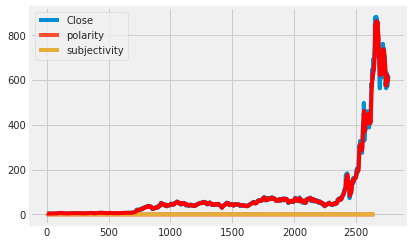

In [67]:
# setting figure size
plt.figure(figsize=(15,10))

# plotting the close price and  rolling mean of close price
tsla_data[['Close','polarity','subjectivity']].plot()
mean=dataset['Close'].rolling(window=5).mean()

mean.plot(color = 'r', label = 'Rolling Mean')

# **Visualizing the Polarity and Subjectivity scores**

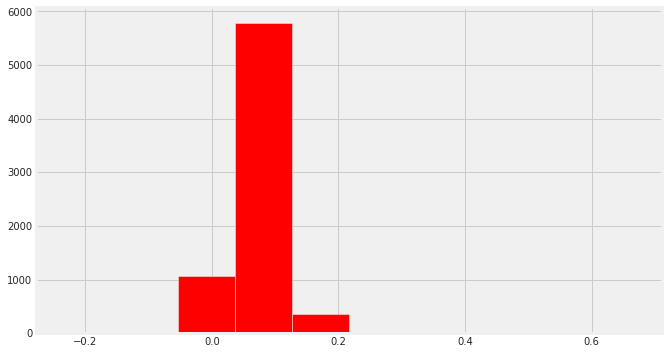

In [68]:
plt.figure(figsize = (10,6))
newsdf['polarity'].hist(color = 'red')

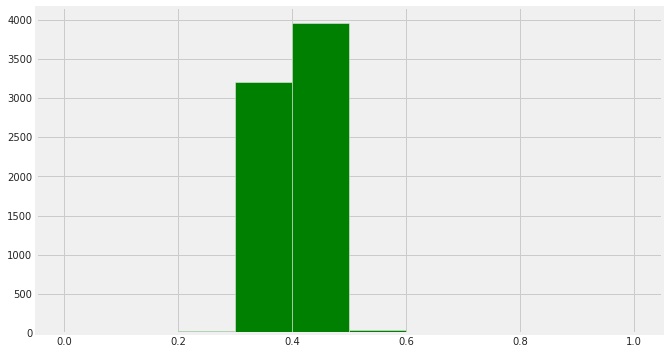

In [69]:
plt.figure(figsize = (10,6))
newsdf['subjectivity'].hist(color = 'green')

# **Calculating Compound for sentiment analysis**

In [102]:
#doing the sentiment analysis of the headlines
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')

sid = SentimentIntensityAnalyzer()
print('Start calculating sentiment scores:')
headline_text = tsla_data['headline_text']
headline_text = str(headline_text).encode('utf-8')
tsla_data['Compound']  = tsla_data['headline_text'].apply(lambda headline_text:sid.polarity_scores(str(headline_text)))
print('Compound Done')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
Start calculating sentiment scores:
Compound Done


Text(0, 0.5, 'Close Price (INR)')

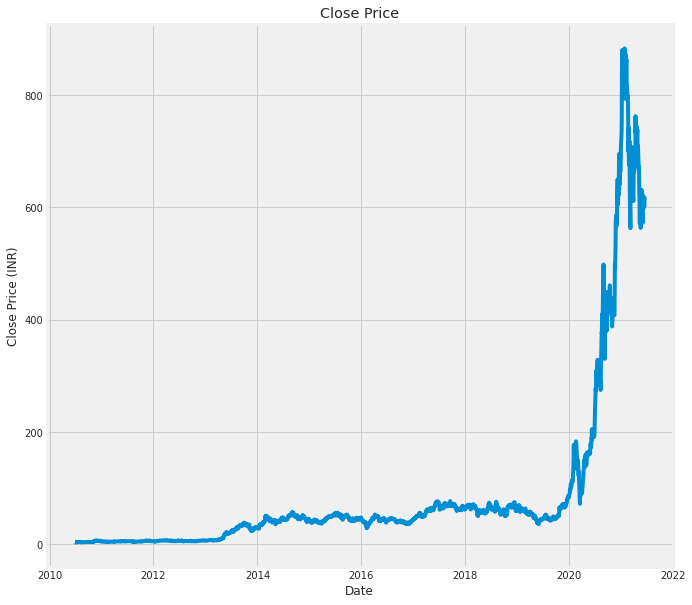

In [103]:
#Setting plot size and labels
plt.figure(figsize=(10,10))

plt.plot(tsla_data['date'],tsla_data['Close'])
plt.title("Close Price")
plt.xlabel('Date')
plt.ylabel('Close Price (INR)')

In [104]:
tsla_data

,date,High,Low,Open,Close,Volume,Adj Close,headline_text,polarity,subjectivity,Compound
0,2010-06-29,5.000000,3.508000,3.800000,4.778000,93831500.0,4.778000,Best Diesel hatchback is. Bharat Desai: Fali; ...,0.065567,0.381724,"{'neg': 0.163, 'neu': 0.745, 'pos': 0.092, 'co..."
1,2010-06-30,6.084000,4.660000,5.158000,4.766000,85935500.0,4.766000,Arati R Jerath: Dinner for Mamata: Pranab stoo...,0.009030,0.376146,"{'neg': 0.155, 'neu': 0.77, 'pos': 0.075, 'com..."
2,2010-07-01,5.184000,4.054000,5.000000,4.392000,41094000.0,4.392000,Anoop Kohli: O! PM. Bharat Desai: Nariman; pay...,0.034511,0.417435,"{'neg': 0.169, 'neu': 0.749, 'pos': 0.082, 'co..."
3,2010-07-02,4.620000,3.742000,4.600000,3.840000,25699000.0,3.840000,In Pics: Nissan Micra. Stuck in traffic? No pr...,0.035142,0.403503,"{'neg': 0.183, 'neu': 0.73, 'pos': 0.087, 'com..."
4,2010-07-06,4.000000,3.166000,4.000000,3.222000,34334500.0,3.222000,A car for the blind by next year. VW Vento to ...,0.053662,0.392284,"{'neg': 0.166, 'neu': 0.755, 'pos': 0.079, 'co..."
...,...,...,...,...,...,...,...,...,...,...,...
2755,2021-06-09,611.789978,597.630005,602.169983,598.780029,16584600.0,598.780029,NaN,NaN,NaN,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
2756,2021-06-10,616.590027,600.500000,603.880005,610.119995,23919600.0,610.119995,NaN,NaN,NaN,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
2757,2021-06-11,612.559998,601.520020,610.229980,609.890015,16165000.0,609.890015,NaN,NaN,NaN,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
2758,2021-06-14,625.489990,609.179993,612.229980,617.690002,20391000.0,617.690002,NaN,NaN,NaN,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."


In [105]:
# dropping unwanted 'headline_text' and rearranging columns
tsla_data.drop(['headline_text'], inplace=True, axis=1)
tsla_data = tsla_data[[ 'Open', 'High', 'Low', 'Volume', 'Compound', 'Close']]

# final stock_data
tsla_data.head()

,Open,High,Low,Volume,Compound,Close
0,3.800,5.000,3.508,93831500.0,"{'neg': 0.163, 'neu': 0.745, 'pos': 0.092, 'co...",4.778
1,5.158,6.084,4.660,85935500.0,"{'neg': 0.155, 'neu': 0.77, 'pos': 0.075, 'com...",4.766
2,5.000,5.184,4.054,41094000.0,"{'neg': 0.169, 'neu': 0.749, 'pos': 0.082, 'co...",4.392
3,4.600,4.620,3.742,25699000.0,"{'neg': 0.183, 'neu': 0.73, 'pos': 0.087, 'com...",3.840
4,4.000,4.000,3.166,34334500.0,"{'neg': 0.166, 'neu': 0.755, 'pos': 0.079, 'co...",3.222


In [106]:
new_compound = tsla_data['Compound'].apply(pd.Series)
new_compound

,neg,neu,pos,compound
0,0.163,0.745,0.092,-0.9998
1,0.155,0.770,0.075,-0.9996
2,0.169,0.749,0.082,-0.9999
3,0.183,0.730,0.087,-0.9999
4,0.166,0.755,0.079,-0.9999
...,...,...,...,...
2755,0.000,1.000,0.000,0.0000
2756,0.000,1.000,0.000,0.0000
2757,0.000,1.000,0.000,0.0000
2758,0.000,1.000,0.000,0.0000


In [108]:
tsla_data = pd.concat([tsla_data, new_compound], axis=1)
tsla_data = tsla_data.drop('Compound', 1)
tsla_data

,Open,High,Low,Volume,Close,neg,neu,pos,compound,neg,neu,pos,compound
0,3.800000,5.000000,3.508000,93831500.0,4.778000,0.163,0.745,0.092,-0.9998,0.163,0.745,0.092,-0.9998
1,5.158000,6.084000,4.660000,85935500.0,4.766000,0.155,0.770,0.075,-0.9996,0.155,0.770,0.075,-0.9996
2,5.000000,5.184000,4.054000,41094000.0,4.392000,0.169,0.749,0.082,-0.9999,0.169,0.749,0.082,-0.9999
3,4.600000,4.620000,3.742000,25699000.0,3.840000,0.183,0.730,0.087,-0.9999,0.183,0.730,0.087,-0.9999
4,4.000000,4.000000,3.166000,34334500.0,3.222000,0.166,0.755,0.079,-0.9999,0.166,0.755,0.079,-0.9999
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2755,602.169983,611.789978,597.630005,16584600.0,598.780029,0.000,1.000,0.000,0.0000,0.000,1.000,0.000,0.0000
2756,603.880005,616.590027,600.500000,23919600.0,610.119995,0.000,1.000,0.000,0.0000,0.000,1.000,0.000,0.0000
2757,610.229980,612.559998,601.520020,16165000.0,609.890015,0.000,1.000,0.000,0.0000,0.000,1.000,0.000,0.0000
2758,612.229980,625.489990,609.179993,20391000.0,617.690002,0.000,1.000,0.000,0.0000,0.000,1.000,0.000,0.0000


# **Building XGBOOST MODEL**

In [109]:
X=tsla_data.iloc[:,:-1].values
Y=tsla_data.iloc[:,-1].values

In [110]:
#splitting the dataset into training and test set
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=0)

In [111]:
#feature scaling
from sklearn.preprocessing import StandardScaler
sc_X=StandardScaler()
X_train=sc_X.fit_transform(X_train)
X_test=sc_X.transform(X_test)

In [112]:
#data modelling
import xgboost 
xgb = xgboost.XGBRegressor()
xgb.fit(X_train, Y_train)

[18:47:41] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [115]:
#gettign the prediction
predictions = xgb.predict(X_test)

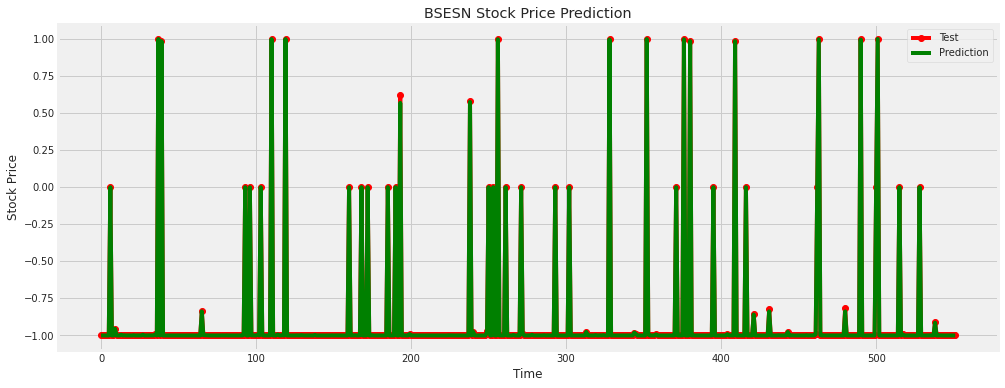

In [131]:
#plotting prediction with respect to Y_test
plt.figure(figsize=(15,6))
plt.plot(Y_test, label='Test', marker='o', color='r')
plt.plot(predictions, label='Prediction', color='g')
plt.title('BSESN Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()

# **Preprocess the headlines to remove the punctuations, stop words and lemmatise the words. Save this pre processed headlines in clean_headlines.csv**


In [126]:
headlines = list(news.headline_text.values)

In [127]:
#Pre-processing news headlines

def preprocess_headlines(headlines):
    if not os.path.isfile('preprocessed_headlines.pkl'):
        preprocessed_headlines = []
        for headline in tqdm(headlines):
            # make every token into lower case words
            tokens = word_tokenize(headline)
            tokens = [token.lower() for token in tokens]

            # Remove punctuation if any
            table = str.maketrans("","",string.punctuation)
            stripped = [w.translate(table) for w in tokens ]
            words = [word for word in stripped if word.isalpha()]

            # Remove Stop words
            stop_words = set(stopwords.words('english'))
            words = [word for word in words if word not in stop_words]
            wordnet_lemmatizer = WordNetLemmatizer()
            lemmatized_words = [wordnet_lemmatizer.lemmatize(i,'v') for i in words]
            preprocessed_headlines.append(lemmatized_words)
        print('Headlines Preprocessed! Saving the preprocessed headlines...')
        with open('preprocessed_headlines.pkl', 'wb') as f:
            pickle.dump(preprocessed_headlines, f)
            
        print('Preprocessed Headline saved for use later')
    else:
        print('Opening saved preprocessed headlines')
        with open('preprocessed_headlines.pkl', 'rb') as f:
            preprocessed_headlines = pickle.load(f)
            
    return preprocessed_headlines

In [128]:
preprocessed_headlines = preprocess_headlines(headlines)

100%|██████████| 3399876/3399876 [16:13<00:00, 3492.12it/s]


Headlines Preprocessed! Saving the preprocessed headlines...
Preprocessed Headline saved for use later


In [130]:
#Opening saved preprocessed headlines
#Save the cleaned headlines
cleaned_headlines = pd.DataFrame([' '.join(sent) for sent in preprocessed_headlines])
cleaned_headlines.columns = ['headlines']
cleaned_headlines.to_csv('clean_headlines.csv')

# **Train the CBOW (Continous Bag Of Words) model to create word embeddings of size 300. After training, each word is represented by 300 dimension vector. Hence, The vocabulary of whole headline corpus is in 300 Dimensions. Save the model as 'word2vec.model'**

In [132]:
#Create and Train Word2Vec Model
#Create the model
 
# I used gensim’s implementation of word2vec algorithm with CBOW architecture. 
# I trained 300 dimensional embeddings with lookup window equal to 4, negative sampling was set to 20 words,
# sub-sampling to 1e-5, and learning rate decayed from 0.03 to 0.0007.
 
w2v_model = Word2Vec(min_count=3,
                     window=4,
                     size=300,
                     sample=1e-5, 
                     alpha=0.03, 
                     min_alpha=0.0007, 
                     negative=20,
                     workers=multiprocessing.cpu_count()-1)
 
start = time()
 
w2v_model.build_vocab(preprocessed_headlines, progress_per=50000)
 
print('Time to build vocab: {} mins'.format(round((time() - start) / 60, 2)))

Time to build vocab: 0.35 mins


In [134]:
w2v_model.train(preprocessed_headlines, total_examples=w2v_model.corpus_count, epochs=40, report_delay=1)
 w2v_model.init_sims(replace=True)

Time to train the model: 38.92 mins


In [135]:
#Save the word2vec model
 
w2v_model.save("word2vec.model")

# **Using K means clustering, create two clusters. This way, all the words in 300 Dimensions, would be divided into 2 Cluster based on spatial similarity.**

In [136]:
#Use K Mean model to create positive and negative clusters from word vectors
 
word_vectors = Word2Vec.load("word2vec.model").wv

In [137]:
model = KMeans(n_clusters=2, max_iter=1000, random_state=True, n_init=50).fit(X=word_vectors.vectors.astype('double'))

In [138]:
#Divide the whole vector space into positive and negative clusters
positive_cluster_index = 1
positive_cluster_center = model.cluster_centers_[positive_cluster_index]
negative_cluster_center = model.cluster_centers_[1-positive_cluster_index]

In [139]:
words = pd.DataFrame(word_vectors.vocab.keys())
words.columns = ['words']
words['vectors'] = words.words.apply(lambda x: word_vectors[f'{x}'])
words['cluster'] = words.vectors.apply(lambda x: model.predict([np.array(x)]))
words.cluster = words.cluster.apply(lambda x: x[0])

# **Determine the sentiment coefficient for each word in headline corpus. The sentiment coefficient is determined by**

A) Closeness score, which is score of closeness of a datapoint from their own cluster centroids and

B) Cluster value, which is 1 or -1 based on if the cluster is positive or negative cluster

C) The closeness score is the score to determine how close a word vector is, to the center of its own cluster


In [140]:
words['cluster_value'] = [1 if i==positive_cluster_index else -1 for i in words.cluster]
words['closeness_score'] = words.apply(lambda x: 1/(model.transform([x.vectors]).min()), axis=1)
words['sentiment_coeff'] = words.closeness_score * words.cluster_value


# **Saving the words (vocabulary) and their sentiment coefficients.**


In [142]:
words[['words', 'sentiment_coeff']].to_csv('sentiment_dictionary.csv', index=False)

# **Determine the TF-IDF value of each word and create the dictionary IF-IDF for each word**

 replacing each word with it's calculated tfidf dictionary with scores of each word
    x - row of dataframe, containing sentences, and their indexes,
    transformed_file - all sentences transformed with TfidfVectorizer
    features - names of all words in corpus used in TfidfVectorizer
    



In [143]:
tfidf = TfidfVectorizer(tokenizer=lambda y: y.split(), norm=None)
tfidf.fit(cleaned_headlines.headlines)
features = pd.Series(tfidf.get_feature_names())
transformed = tfidf.transform(cleaned_headlines.headlines)

/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:507: UserWarning:

The parameter 'token_pattern' will not be used since 'tokenizer' is not None'



In [145]:
#Create a dictionary of TF-IDF of each word and replace each word in sentence with TF-IDF score

def create_tfidf_dictionary(x, transformed_file, features):
    
    vector_coo = transformed_file[x.name].tocoo()
    vector_coo.col = features.iloc[vector_coo.col].values
    dict_from_coo = dict(zip(vector_coo.col, vector_coo.data))
    return dict_from_coo

def replace_tfidf_words(x, transformed_file, features):
    
    dictionary = create_tfidf_dictionary(x, transformed_file, features)   
    return list(map(lambda y:dictionary[f'{y}'], x.headlines.split()))

# **Replace the words in sentence with TF-IDF value from the above dictionary, to get the TF-IDF vector of the sentence.**


In [148]:
#this step takes around 10 minutes to calculate
replaced_tfidf_scores = cleaned_headlines.apply(lambda x: replace_tfidf_words(x, transformed, features), axis=1)

# **Replace the words in sentence with sentiment coefficients created above, from Sentiment Coefficient dictionary to create another vector.**

In [149]:
def replace_sentiment_words(word, sentiment_dict):
    try:
        out = sentiment_dict[word]
    except KeyError:
        out = 0
    return out

In [150]:
sentiment_map = pd.read_csv('sentiment_dictionary.csv')
sentiment_dict = dict(zip(sentiment_map.words.values, sentiment_map.sentiment_coeff.values))

In [151]:
replaced_closeness_scores = cleaned_headlines.headlines.apply(lambda x: list(map(lambda y: replace_sentiment_words(y, sentiment_dict), x.split())))

In [152]:
replacement_df = pd.DataFrame(data=[replaced_closeness_scores, replaced_tfidf_scores, cleaned_headlines.headlines]).T
replacement_df.columns = ['sentiment_coeff', 'tfidf_scores', 'sentence']

# **Take the dot product of both vectors to determine the sentiment rate.**


In [153]:
replacement_df['sentiment_rate'] = replacement_df.apply(lambda x: np.array(x.loc['sentiment_coeff']) @ np.array(x.loc['tfidf_scores']), axis=1)
replacement_df['prediction'] = (replacement_df.sentiment_rate>0).astype('int8')
replacement_df['sentiment'] = [1 if i==1 else 0 for i in replacement_df.prediction]

In [154]:
replacement_df.head()

,sentiment_coeff,tfidf_scores,sentence,sentiment_rate,prediction,sentiment
0,"[-1.0009391080344725, -1.0101068053618]","[9.085565601590881, 11.294317684098168]",raju chacha,-20.502565,0,0
1,"[0.9977365393358724, 0.9886174479471946, 1.006...","[10.562786260529906, 9.395460079313745, 10.228...",noisy effort spruce commercial street,46.527458,1,1
2,"[0, 1.0083314555401668, 1.0058449564939118]","[15.346102631901472, 13.842025235125197, 8.965...",akkialur ranebennur peaceful,22.975735,1,1
3,"[-1.006821920401232, 0.9956298869497062, 0.991...","[8.987394189505522, 10.835243125384622, 6.8626...",america unwanted head india,13.175807,1,1
4,"[1.0162149773845166, 1.0044279736217687, 1.003...","[7.220471643424408, 7.070471577323462, 5.75060...",auto driver murder hold,25.115106,1,1


# **Predict Sentiment**
At this point of time, we have two vectors of sentences:
1. Vector from the sentiment coefficients of each word
2. Vector from the TF-IDF score of each word

We have to take the dot product of these vector to determine the sentiment rate.

If the sentiment rate is positive => Sentiment = POSITIVE

If the sentiment rate is negative => Sentiment = NEGATIVE

In [160]:
news['Sentiment Prediction'] = replacement_df.sentiment

In [161]:
mapper = {0:'Negative',1:'Positive'}
news['Overall Predicted Sentiment'] = news['Sentiment Prediction'].map(mapper)
news

,publish_date,headline_category,headline_text,Sentiment Prediction,Overall Predicted Sentiment
0,2001-01-02,entertainment.hindi.bollywood,Raju Chacha,0,Negative
1,2001-01-02,unknown,A noisy effort to spruce up Commercial Street,1,Positive
2,2001-01-02,unknown,Akki-Alur and Ranebennur peaceful,1,Positive
3,2001-01-02,unknown,America's unwanted heading for India?,1,Positive
4,2001-01-02,unknown,Auto driver's murder: 4 held,1,Positive
...,...,...,...,...,...
3399871,2020-12-31,world.china,25 days that changed the world: How Covid-19 s...,1,Positive
3399872,2020-12-31,world.pakistan,Pakistan: Destruction of Hindu temple condemned,1,Positive
3399873,2020-12-31,world.pakistan,US ready to try Pearl killers if Pakistan cour...,1,Positive
3399874,2020-12-31,world.rest-of-world,Yemen airport blasts kill 26 as government pla...,1,Positive


In [162]:
# Below are sme example of the result, which is pretty satisfactory

news.iloc[[181456,134253,167447,154347,154673,182345,156123,137623,182303,169392],:]

,publish_date,headline_category,headline_text,Sentiment Prediction,Overall Predicted Sentiment
181456,2003-02-06,india,Surgeon's kidnap leads to public protests in P...,1,Positive
134253,2002-08-23,city.bengaluru,Loadshedding back,1,Positive
167447,2002-12-18,delhi-times,How the bookie crumbled,1,Positive
154347,2002-11-03,city.patna,Shahnawaz for growth of tourism in Bihar,1,Positive
154673,2002-11-04,entertainment.hindi.bollywood,Rahman among top ten Asian pay earners in UK,1,Positive
182345,2003-02-10,city.hyderabad,Man found in burnt cellar dies,1,Positive
156123,2002-11-10,business.india-business,Profit-making companies cannot be sold off: Sonia,1,Positive
137623,2002-09-03,city.pune,Residents oppose Aundh road project,1,Positive
182303,2003-02-10,city.ahmedabad,56 lakh children given polio drops,1,Positive
169392,2002-12-25,india,Instead of achievements; hurdles meet the eye,1,Positive


# **TIME SERIES ANALYSIS OF TESLA INC (TSLA STOCKS) WITH SENTIMENT ANALYSIS**

## Using Recurrent Neural Netwoks
- Time Forecasting for next day is done on 'Close' value forTesla Inc. (TSLA) stocks

- Split the data before 31st Dec 2019. Hence, the training data is before 31st Dec 2019 and prediction will be done for year 2020 starting from 1st January 2020

- Normalize the Close values between value 0 and 1 for better training

- Prepare and Train the RNN / LSTM model

- Prepare the test data from the close values after 31st Dec 2019

- Do predictions on ab0ve prepared the test data 

In [163]:
!pip install git+https://github.com/tensorflow/docs

  Cloning https://github.com/tensorflow/docs to /tmp/pip-req-build-x7szzwdv
  Running command git clone -q https://github.com/tensorflow/docs /tmp/pip-req-build-x7szzwdv
     |████████████████████████████████| 1.0MB 7.5MB/s 
  Created wheel for tensorflow-docs: filename=tensorflow_docs-0.0.03e08f1e1739dede8d9f6f283b4353bf330ca0506_-cp37-none-any.whl size=153572 sha256=95fbf55b8d1167d5f019f98a87de71cc014a37aa317340ee4e8c3b150d93e7ec
  Stored in directory: /tmp/pip-ephem-wheel-cache-5c3iwj2s/wheels/eb/1b/35/fce87697be00d2fc63e0b4b395b0d9c7e391a10e98d9a0d97f
Successfully built tensorflow-docs
  Found existing installation: protobuf 3.12.4
    Uninstalling protobuf-3.12.4:
      Successfully uninstalled protobuf-3.12.4


In [165]:
import tensorflow_docs as tfdocs
import tensorflow_docs.modeling

# **Time Forecasting for next day is done on 'Close' value for Tesla Inc. (TSLA) stocks**

In [173]:
#Get Time Series Series Data for 'Close'

close_data = tsla_data['Close'].values
dates = tsla_data['date'].values

# **Split the data before 31st Dec 2019. Hence, the training data is before 31st Dec 2019 and prediction will be done for year 2020 starting from 1st January 2020**

In [174]:
from datetime import datetime

split_date = datetime(2020,12,31)

In [176]:
# Selecting the training data before 31-Dec-2017
train_df = tsla_data.loc[tsla_data['date'] <= split_date]
train_close = train_df['Close'].values
train_dates = train_df['date'].values
# Selecting the testing data before 31-Dec-2017
test_df = tsla_data.loc[tsla_data['date'] > split_date]
test_close = test_df['Close'].values
test_dates = test_df['date'].values

# **Normalize the Close values between value 0 and 1 for better training**

In [177]:
# Reshaping the training array to apply Standard Scaler
train_close_values = train_close.reshape(-1,1)

In [178]:
train_close_values = train_close[:,~np.all(np.isnan(0), axis=0)]

In [179]:
scaler = MinMaxScaler(feature_range=(0, 1))
train_close_scaled = scaler.fit_transform(train_close_values)

In [180]:
# creating data structure with 30 days as input and 31'st day as output
X_train = []
y_train = []

for i in range(30,len(train_close_scaled)):
    X_train.append(train_close_scaled[i-30:i,0])
    y_train.append(train_close_scaled[i,0])

X_train,y_train = np.array(X_train),np.array(y_train)

In [181]:
#Reshaping data as expected by RNN model in tensorflow 2.0

X_train = np.reshape(X_train,(X_train.shape[0],X_train.shape[1],1))

# **Prepare and Train the RNN / LSTM model**

In [182]:
def createLSTM_model(X_train):
    regressor = Sequential()

    # Adding 4 layers on LSTM
    regressor.add(LSTM(units=50,return_sequences=True,input_shape=(X_train.shape[1],1)))
    regressor.add(Dropout(0.2))


    regressor.add(LSTM(units=50,return_sequences=True))
    regressor.add(Dropout(0.2))


    regressor.add(LSTM(units=50,return_sequences=True))
    regressor.add(Dropout(0.2))


    regressor.add(LSTM(units=50))
    regressor.add(Dropout(0.2))

    # Adding output layer

    regressor.add(Dense(units=1))
    
    regressor.compile(optimizer='adam',loss='mean_squared_error')
    
    print(regressor.summary())
    
    return regressor

# **Train the RNN / LSTM Model**

In [183]:
model = createLSTM_model(X_train)

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_12 (LSTM)               (None, 30, 50)            10400     
_________________________________________________________________
dropout_12 (Dropout)         (None, 30, 50)            0         
_________________________________________________________________
lstm_13 (LSTM)               (None, 30, 50)            20200     
_________________________________________________________________
dropout_13 (Dropout)         (None, 30, 50)            0         
_________________________________________________________________
lstm_14 (LSTM)               (None, 30, 50)            20200     
_________________________________________________________________
dropout_14 (Dropout)         (None, 30, 50)            0         
_________________________________________________________________
lstm_15 (LSTM)               (None, 50)               

In [184]:
early_stopping = EarlyStopping(monitor='val_loss',patience=3,mode='min')

In [185]:
model.fit(X_train,y_train,epochs=100,batch_size=32,callbacks=[tfdocs.modeling.EpochDots(),early_stopping],validation_split=0.2)

Epoch 1/100
66/66 [==============================] - 6s 27ms/step - loss: 2.8625e-04 - val_loss: 0.0119

Epoch: 0, loss:0.0003,  val_loss:0.0119,  
.Epoch 2/100
66/66 [==============================] - 1s 11ms/step - loss: 5.5188e-05 - val_loss: 0.0128
.Epoch 3/100
66/66 [==============================] - 1s 11ms/step - loss: 5.1898e-05 - val_loss: 0.0099
.Epoch 4/100
66/66 [==============================] - 1s 11ms/step - loss: 5.0625e-05 - val_loss: 0.0111
.Epoch 5/100
66/66 [==============================] - 1s 11ms/step - loss: 4.6296e-05 - val_loss: 0.0143
.Epoch 6/100
66/66 [==============================] - 1s 11ms/step - loss: 4.7118e-05 - val_loss: 0.0100
.

In [187]:
#Save the trained model¶

model.save("StockPricePrediction.h5")

# **Prepare the test data from the close values after 31st Dec 2019**


In [188]:
#Prepare test data

# NOTE: The variable 'close_test_values' contains array of test data after split and 30 previous values from train data
# NOTE : The variable 'test_close' only contains the test data after the split

# This is done because, in order to predict the 1st value of test data, we need 30 previous values as training data

close_test_values = close_data[len(close_data) - len(test_close)-30:] # Contains the test data and 30 values from training data

In [189]:
# Reshaping the close_test_values (test data) to apply the Standand Scaler
close_test_values = close_test_values.reshape(-1,1)

In [190]:
inputs_scaled = scaler.transform(close_test_values)

In [191]:
X_test = []
for i in range(30,inputs_scaled.shape[0]):
    X_test.append(inputs_scaled[i-30:i,0])
X_test = np.array(X_test)

In [192]:
# Reshape the test data as expected by LSTM
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))

# **Do predictions on above prepared the test data**

In [193]:
#Predict the Stock Price of 2020 after December 2019

predicted_stock_price = model.predict(X_test)

In [194]:
predicted_stock_price = scaler.inverse_transform(predicted_stock_price)

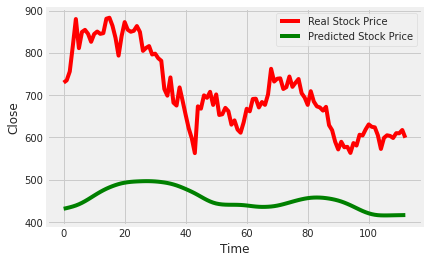

In [195]:
plt.plot(test_close,color='red',label='Real Stock Price')
plt.plot(predicted_stock_price,color='green',label='Predicted Stock Price')
plt.xlabel("Time")
plt.ylabel("Close")
plt.legend()


# **Combined Visualisations from Stock Market and Sentiment Analysis Predictions**

In [196]:
#plotly imports
import plotly as py
import plotly.graph_objs as go
import plotly.express as px


In [205]:
sentiment_analysis_df = news.groupby(['publish_date','Overall Predicted Sentiment']).agg({'Overall Predicted Sentiment':'count'})
sentiment_analysis_df.columns = ['Count of Sentiments']

In [206]:
sentiment_analysis_df = sentiment_analysis_df.reset_index()

In [209]:
sentiment_analysis_df.head()

,publish_date,Overall Predicted Sentiment,Count of Sentiments
0,2001-01-02,Negative,9
1,2001-01-02,Positive,49
2,2001-01-03,Negative,10
3,2001-01-03,Positive,31
4,2001-01-04,Negative,27


In [210]:
positive_sentiments_df = sentiment_analysis_df[sentiment_analysis_df['Overall Predicted Sentiment'] == 'Positive']

In [215]:
fig = px.line(positive_sentiments_df, x='publish_date', y='Count of Sentiments',
              
              title='Positive Sentiment Articles Trend')
fig.update_xaxes(rangeslider_visible=True)
fig.show()

In [216]:
negative_sentiments_df = sentiment_analysis_df[sentiment_analysis_df['Overall Predicted Sentiment'] == 'Negative']

In [217]:
fig = px.line(negative_sentiments_df, x='publish_date', y='Count of Sentiments',
              
              title='Negative Sentiment Articles Trend')
fig.update_xaxes(rangeslider_visible=True)
fig.show()


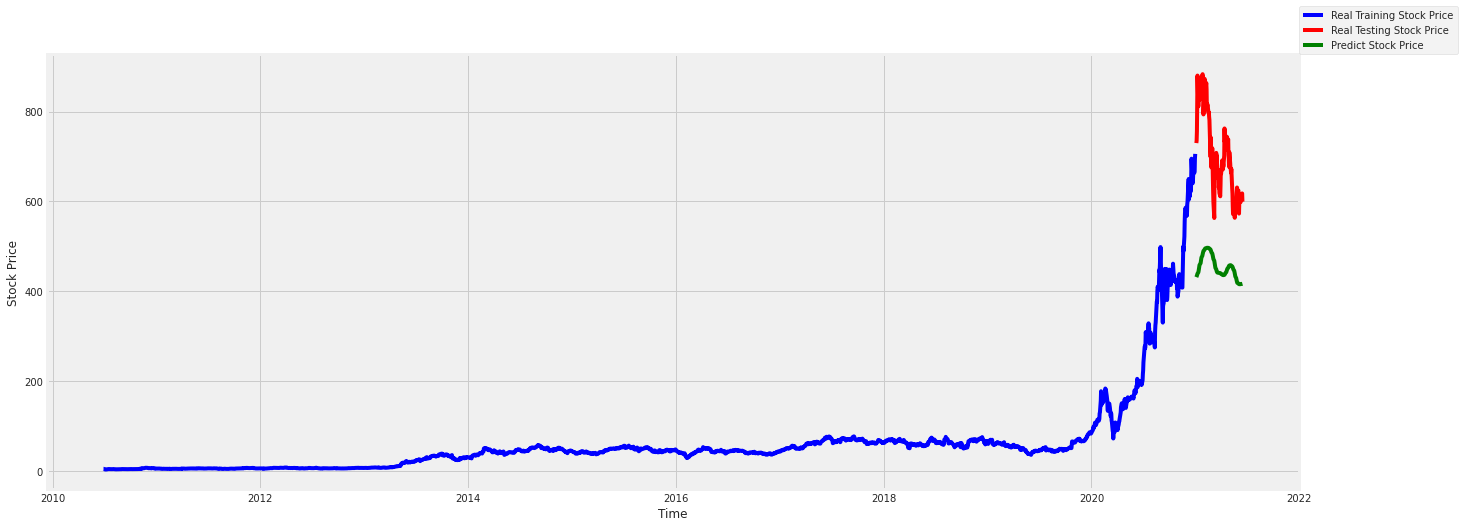

In [214]:
plt.figure(figsize=(20,8))
plt.plot(train_dates,train_close,color='blue',label='Real Training Stock Price')
plt.plot(test_dates,test_close,color='red',label='Real Testing Stock Price')
plt.plot(test_dates,predicted_stock_price,color='green',label='Predict Stock Price')
plt.xlabel("Time")
plt.ylabel("Stock Price")
plt.legend(loc=(1,1))